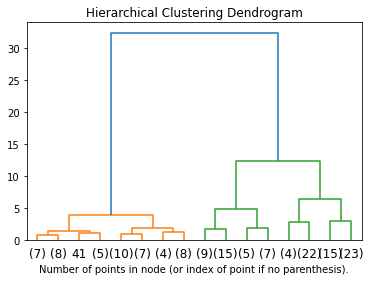

In [8]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.savefig('../../期末作业/figures/层次聚类树图.png', dpi=900)

### 层次聚类

In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


各个簇的样本数目：
0    64
1    50
2    36
dtype: int64
聚类结果：
[[ 0 50  0]
 [49  0  1]
 [15  0 35]]


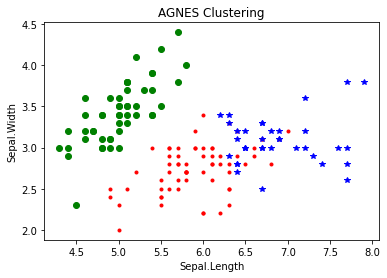

In [6]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
 
iris = datasets.load_iris()
irisdata = iris.data
 
clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)
 
res = clustering.fit(irisdata)
 
print ("各个簇的样本数目：")
print (pd.Series(clustering.labels_).value_counts())
print ("聚类结果：")
print (confusion_matrix(iris.target, clustering.labels_))
 
plt.figure()
d0 = irisdata[clustering.labels_ == 0]
plt.plot(d0[:, 0], d0[:, 1], 'r.')
d1 = irisdata[clustering.labels_ == 1]
plt.plot(d1[:, 0], d1[:, 1], 'go')
d2 = irisdata[clustering.labels_ == 2]
plt.plot(d2[:, 0], d2[:, 1], 'b*')
plt.xlabel("Sepal.Length")
plt.ylabel("Sepal.Width")
plt.title("AGNES Clustering")
plt.savefig('../../期末作业/figures/层次聚类图.png', dpi=900)
plt.show()